In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ride_df = pd.read_csv("ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
city_df = pd.read_csv("city_data.csv")
city_df["city"].value_counts()
city_df.loc[city_df["city"] == "Port James",:]
city_df.sort_values("city")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
ridegrpbycity = ride_df.groupby("city",as_index = None)
ridegrp_df = pd.DataFrame(ridegrpbycity["fare"].sum())
#ridegrp_df
#type(ridegrp_df)

In [7]:
ridegrpbycity.count()
ridercount = ridegrpbycity["ride_id"].count()
ridercount
ridegrp_df["ridecount"] = ridercount["ride_id"]
ridegrp_df.head()
type(ridegrp_df)

pandas.core.frame.DataFrame

In [8]:
fareavg = ridegrpbycity["fare"].mean()
ridegrp_df["avgfare"] = fareavg["fare"]
ridegrp_df.head()
ridegrp_df.loc[ridegrp_df["city"] == "Port James",:]

,city,fare,ridecount,avgfare
72,Port James,1017.81,32,31.806562


In [9]:
citygrp = city_df.groupby("city",as_index = None)
#citygrp.sum().sort_values("driver_count",ascending = False)
citygrp.sum()
citygrp_df = citygrp.sum()
citygrp_df1 = pd.merge(city_df,citygrp_df, on = "city")
citygrp_df1.loc[citygrp_df1["city"]=="Port James",:]
citygrp_df1.drop(citygrp_df1.loc[(citygrp_df1["city"]=="Port James") & (citygrp_df1["driver_count_x"] == 3),:].index,inplace = True)

In [10]:
citygrp_df1.loc[citygrp_df1["city"]=="Port James",:]

citygrp_df1 = citygrp_df1.rename(columns={"driver_count_y": "driver_count"})

In [15]:
del citygrp_df1["driver_count_x"]
citygrp_df1.head()

,city,type,driver_count
0,Kelseyland,Urban,63
1,Nguyenbury,Urban,8
2,East Douglas,Urban,12
3,West Dawnfurt,Urban,34
4,Rodriguezburgh,Urban,52


In [16]:
combined_df = pd.merge(ridegrp_df, citygrp_df1, on="city")
combined_df.head()

,city,fare,ridecount,avgfare,type,driver_count
0,Alvarezhaven,741.79,31,23.928710,Urban,21
1,Alyssaberg,535.85,26,20.609615,Urban,67
2,Anitamouth,335.84,9,37.315556,Suburban,16
3,Antoniomouth,519.75,22,23.625000,Urban,21
4,Aprilchester,417.65,19,21.981579,Urban,49


In [103]:
combined_df["type"].value_counts()
urban_df = combined_df.loc[combined_df["type"]=="Urban",:]
rural_df = combined_df.loc[combined_df["type"]=="Rural",:]
suburban_df = combined_df.loc[combined_df["type"]=="Suburban",:]

24.971818181818183

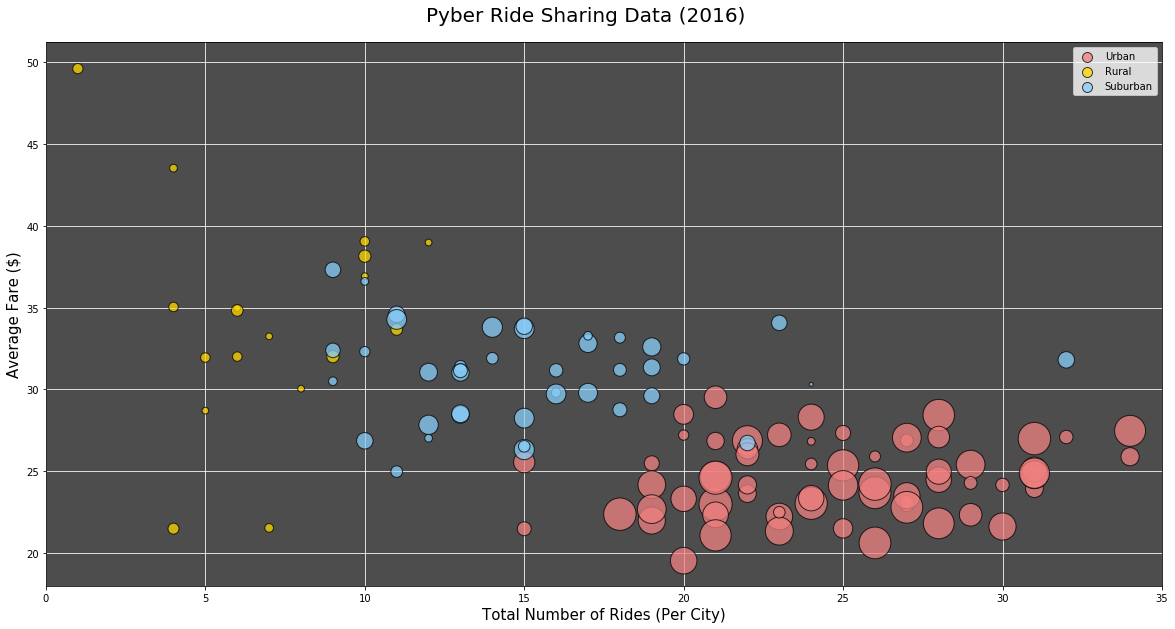

In [243]:
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle("Pyber Ride Sharing Data (2016)",fontsize=20,y=.93)
#ax1.axis(frameon = 0)
ax1.set_xlabel("Total Number of Rides (Per City)")
ax1.set_ylabel("Average Fare ($)")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
plt.xlim(0, 35)
ax1.set_axisbelow(True)
ax1.patch.set_facecolor('.3')

ax1.scatter(urban_df["ridecount"], urban_df["avgfare"], s=urban_df["driver_count"]*15, edgecolors='black',c='lightcoral', label = 'Urban',alpha=.75)
ax1.scatter(rural_df["ridecount"], rural_df["avgfare"], s=rural_df["driver_count"]*15, edgecolors='black', c='gold', label = 'Rural',alpha=.75)
ax1.scatter(suburban_df["ridecount"], suburban_df["avgfare"], s=suburban_df["driver_count"]*15, edgecolors='black',c='lightskyblue', label = 'Suburban',alpha=.75)
plt.grid(color='w')
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])

In [122]:
combined_df.head()

,city,fare,ridecount,avgfare,type,driver_count
0,Alvarezhaven,741.79,31,23.928710,Urban,21
1,Alyssaberg,535.85,26,20.609615,Urban,67
2,Anitamouth,335.84,9,37.315556,Suburban,16
3,Antoniomouth,519.75,22,23.625000,Urban,21
4,Aprilchester,417.65,19,21.981579,Urban,49


In [128]:
combined_df_grp = combined_df.groupby("type",as_index=None)
combined_grpdf =combined_df_grp.sum()
combined_grpdf

,type,fare,ridecount,avgfare,driver_count
0,Rural,4255.09,125,615.728572,104
1,Suburban,19317.88,625,1268.627391,638
2,Urban,40078.34,1625,1623.863390,2607


In [224]:
# Labels for the sections of our pie chart
labels = combined_grpdf["type"]

# The values of each section of the pie chart
sizes = combined_grpdf["fare"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral" ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.05)

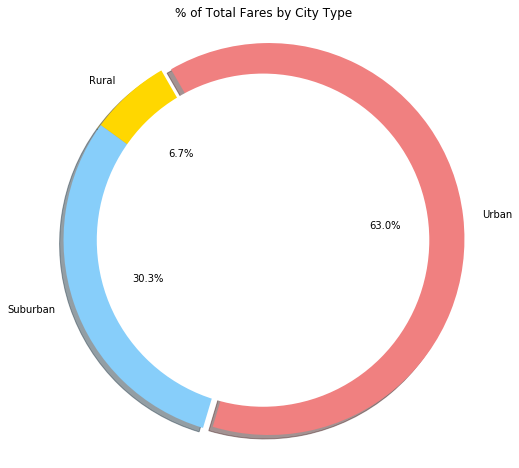

In [227]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fig = plt.gcf()

centre_circle = plt.Circle((.02,-0.0),0.85,fc='white')
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,8)
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%",explode=explode, shadow=True,startangle=120)
plt.title("% of Total Fares by City Type")

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.show()

In [181]:
# Labels for the sections of our pie chart
labels = combined_grpdf["type"]

# The values of each section of the pie chart
sizes = combined_grpdf["ridecount"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral" ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

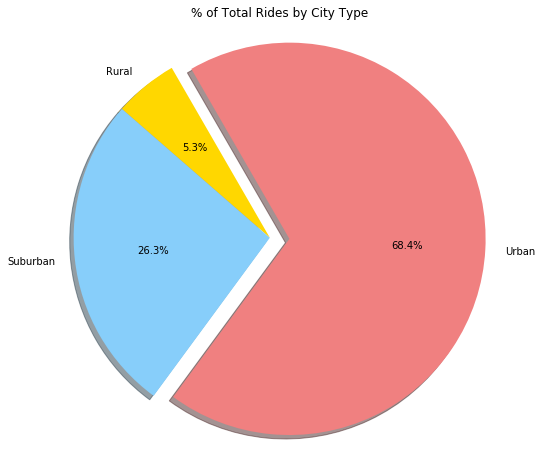

In [182]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)
plt.title("% of Total Rides by City Type")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

In [183]:
# Labels for the sections of our pie chart
labels = combined_grpdf["type"]

# The values of each section of the pie chart
sizes = combined_grpdf["driver_count"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral" ]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

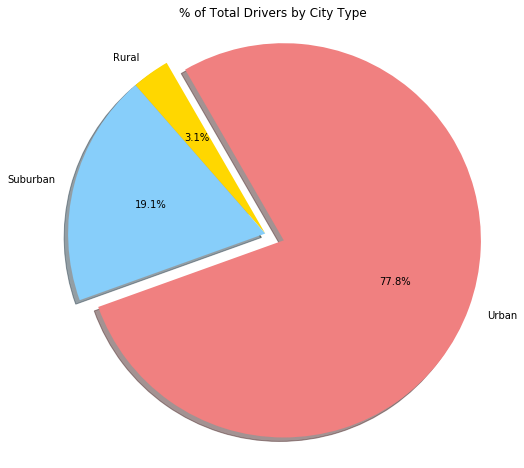

In [184]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)
plt.title("% of Total Drivers by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()